This notebook try to better understand the Kernel Density Estimation

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# KDE better understand

In [2]:
# test the KDE estimation
N1 = 100 # number of data in data set 1
m1 = -1  # mean value
s1 = 0.1 # % variance 

N2 = 500 # number of data in data set 2
m2 = 2   # mean value
s2 = 0.5 # variance 

x1 = math.sqrt(s1)*np.random.randn(N1,1) + m1
x2 = math.sqrt(s2)*np.random.randn(N2,1) + m2
x_data = np.concatenate((x1,x2),axis=0)

assume a dataset `x_data`, and you have no idea of what this dataset is. But you are trying to find the shape of the dataset

##  Lets look at histogram of the dataset

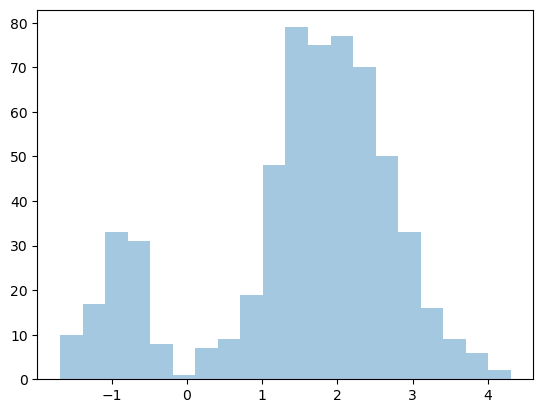

In [3]:
plt.hist(x_data, lw=2, bins = 20, alpha = 0.4)
plt.show()

## Before evaluating KDE the shape let's define two smoothing parameter.

In [4]:
h = 0.1       # bandwidth
n_points = 100 # number of abscis points in kde

## define a uniform function

In [5]:
def K(u):
    idxs = np.where(abs(u)<=1)
    y = np.zeros(u.size)
    y[idxs[0]] = 1.0/2.0
    return y


## Create some  uniformly spearated number set

## KDE

Let x_data = (x1, x2, ..., xn) be independent and identically distributed samples drawn from some univariate distribution with an unknown density ƒ at any given point x. We are interested in estimating the shape of this function ƒ. Its kernel density estimator is

${\displaystyle {\widehat {f}}_{h}(x)={\frac {1}{n}}\sum _{i=1}^{n}K_{h}(x-x_{i})={\frac {1}{nh}}\sum _{i=1}^{n}K{\Big (}{\frac {x-x_{i}}{h}}{\Big )},}{\displaystyle {\widehat {f}}_{h}(x)={\frac {1}{n}}\sum _{i=1}^{n}K_{h}(x-x_{i})={\frac {1}{nh}}\sum _{i=1}^{n}K{\Big (}{\frac {x-x_{i}}{h}}{\Big )},}$
where K is the kernel — a non-negative function — and h > 0 is a smoothing parameter called the bandwidth. A kernel with subscript h is called the scaled kernel and defined as Kh(x) = 1/h K(x/h). Intuitively one wants to choose h as small as the data will allow; however, there is always a trade-off between the bias of the estimator and its variance. The choice of bandwidth is discussed in more detail below.

In [6]:
x = np.linspace(min(x_data), max(x_data), n_points)
n = x_data.size
y = np.zeros(n_points)

In [7]:
for ii in np.arange(n_points):
    # apply the kernel to the point of interest
    y[ii] = 1.0/(n*h) * np.sum(K((x[ii]-x_data)/h ))

## So using a Kernel `K` we get some function, which does not have a functional form but have a list of x's and corresponding y's

In [8]:
x.reshape(100), y

(array([-1.68541775, -1.62488517, -1.56435258, -1.50382   , -1.44328742,
        -1.38275483, -1.32222225, -1.26168967, -1.20115709, -1.1406245 ,
        -1.08009192, -1.01955934, -0.95902675, -0.89849417, -0.83796159,
        -0.777429  , -0.71689642, -0.65636384, -0.59583126, -0.53529867,
        -0.47476609, -0.41423351, -0.35370092, -0.29316834, -0.23263576,
        -0.17210318, -0.11157059, -0.05103801,  0.00949457,  0.07002716,
         0.13055974,  0.19109232,  0.25162491,  0.31215749,  0.37269007,
         0.43322265,  0.49375524,  0.55428782,  0.6148204 ,  0.67535299,
         0.73588557,  0.79641815,  0.85695073,  0.91748332,  0.9780159 ,
         1.03854848,  1.09908107,  1.15961365,  1.22014623,  1.28067882,
         1.3412114 ,  1.40174398,  1.46227656,  1.52280915,  1.58334173,
         1.64387431,  1.7044069 ,  1.76493948,  1.82547206,  1.88600464,
         1.94653723,  2.00706981,  2.06760239,  2.12813498,  2.18866756,
         2.24920014,  2.30973273,  2.37026531,  2.4

## Let's plot the function

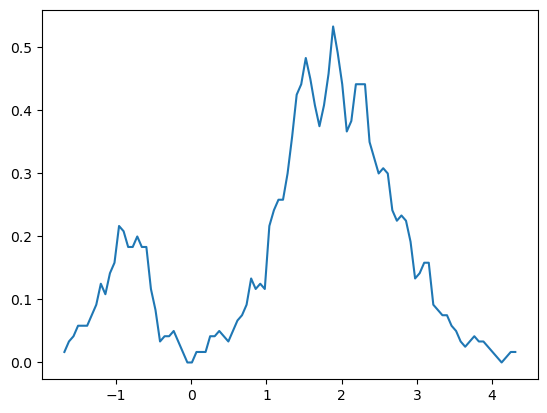

In [9]:
plt.plot(x.reshape(100), y)
plt.show()

## Let's plot function and dataset together

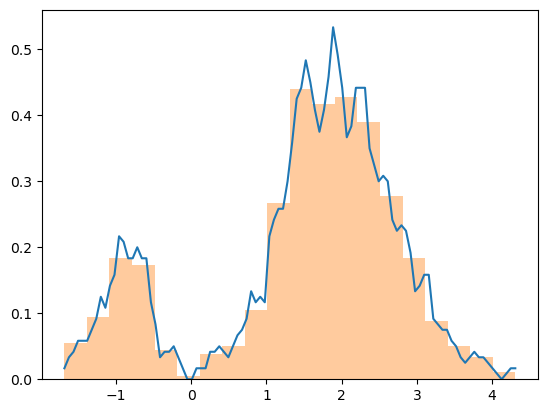

In [10]:
plt.plot(x.reshape(100), y)
plt.hist(x_data, lw=2, bins = 20, alpha = 0.4, density=1)
plt.show()

## We can take help of  (x, y) and interpolation algorithm to find function

# As a compact function

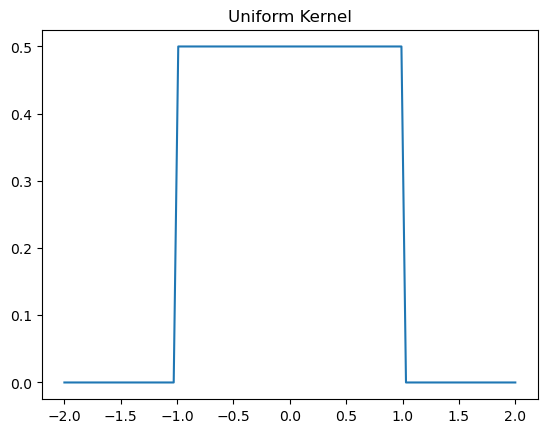

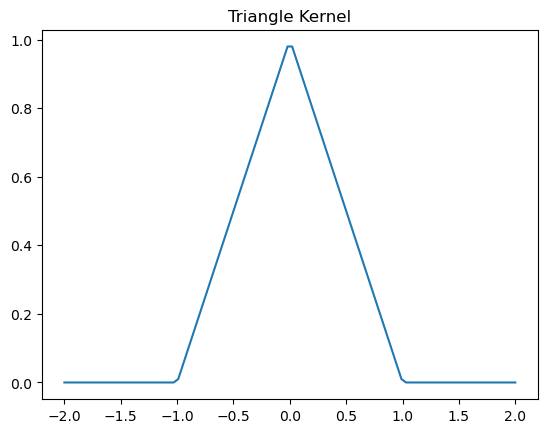

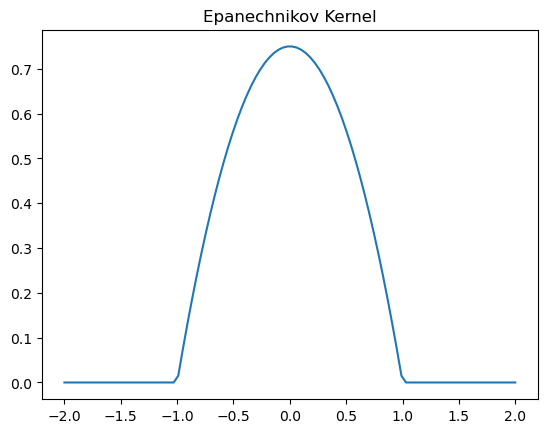

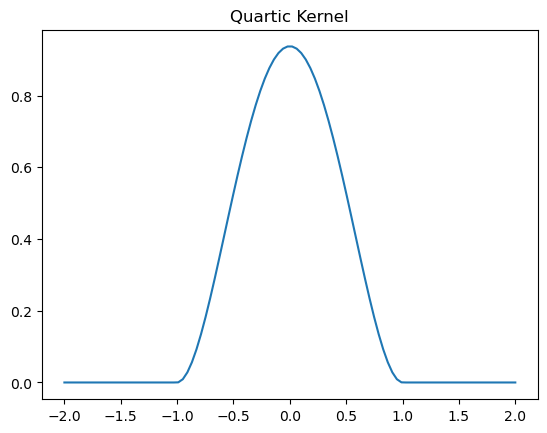

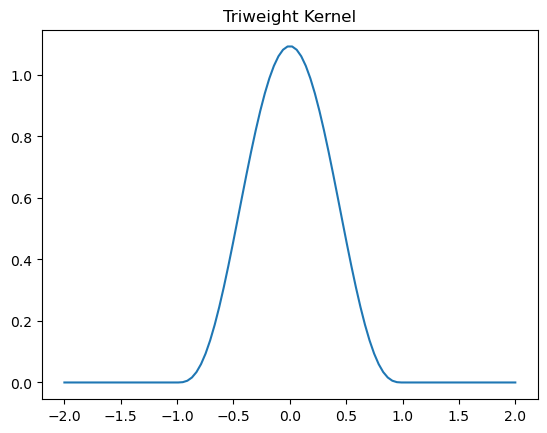

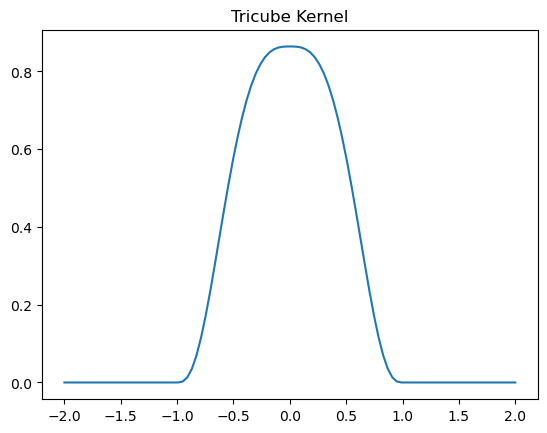

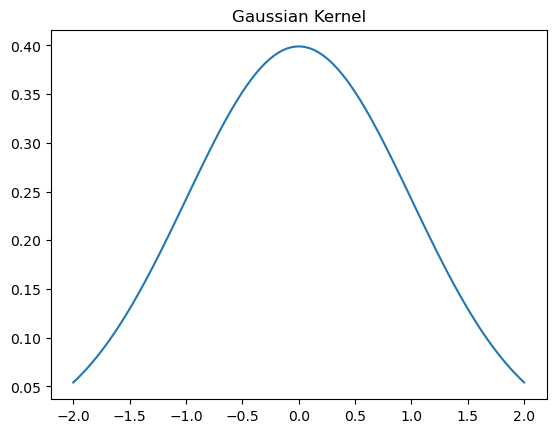

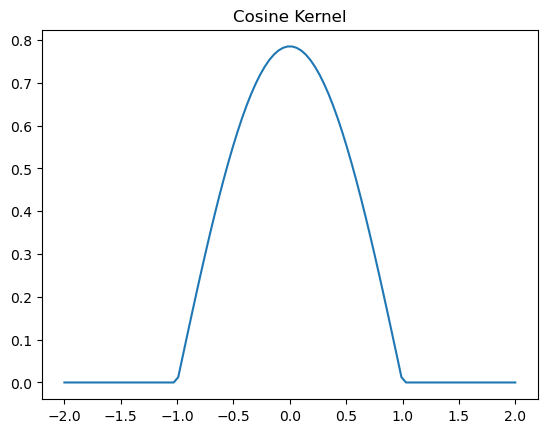

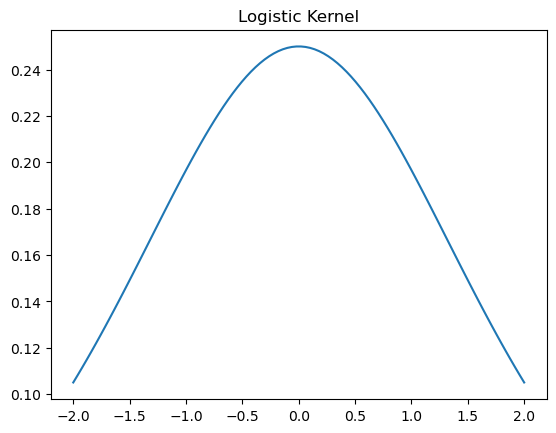

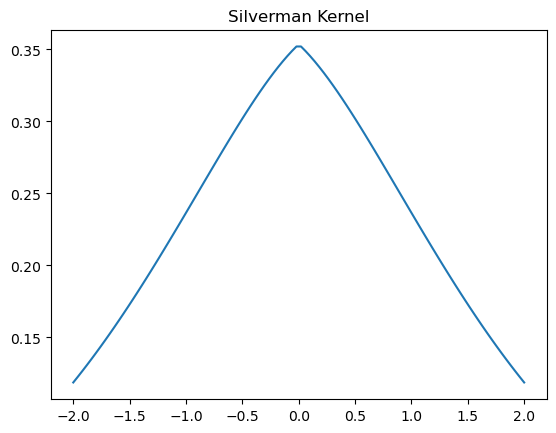

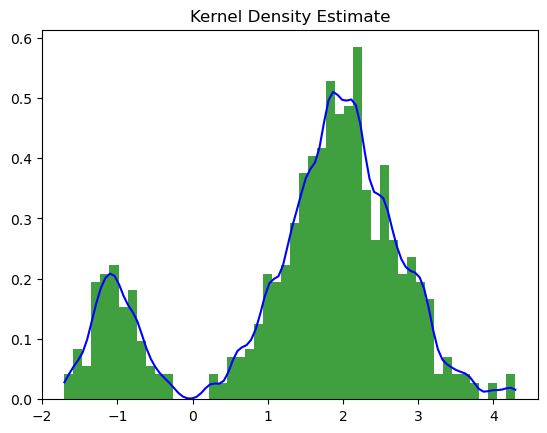

In [11]:
import math
import numpy as np

"""
kde.py contains routines which help perform Kernel Density Estimation (KDE).
"""

def kde(x_i, kernel, h, n_points):
    """ Perform Kernel Density Estimation on a given set of points.
    Inputs:
    x_i -- the input data set, should be a numpy array
    kernel -- the kernel to use, must be a string of one of the choices:
                Uniform
                Triangular
                Epanechnikov
                Quartic
                Triweight
                Tricube
                Gaussian
                Cosine
                Logistic
                Silverman
    h -- the kernel bandwidth setting
    npoints -- the number of desired points in the kernel density estimate
     
    Outputs:
    y -- the kernel density estimate
    """
    # define the points over which we will generate the kernel density estimate
    x = np.linspace(min(x_i), max(x_i), n_points)
    n = x_i.size
    y = np.zeros(n_points)
    
    for ii in np.arange(n_points):
        # apply the kernel to the point of interest
        if(kernel.lower()=='uniform'):
            y[ii] = 1.0/(n*h) * np.sum(uniform_kernel( (x[ii]-x_i)/h ) )
        elif(kernel.lower()=='triangular'):
            y[ii] = 1.0/(n*h) * np.sum(triangle_kernel( (x[ii]-x_i)/h ) )
        elif(kernel.lower()=='epanechnikov'):
            y[ii] = 1.0/(n*h) * np.sum(epanechnikov_kernel( (x[ii]-x_i)/h ) )
        elif(kernel.lower()=='quartic'):
            y[ii] = 1.0/(n*h) * np.sum(quartic_kernel( (x[ii]-x_i)/h ) )
        elif(kernel.lower()=='triweight'):
            y[ii] = 1.0/(n*h) * np.sum(triweight_kernel( (x[ii]-x_i)/h ) )
        elif(kernel.lower()=='tricube'):
            y[ii] = 1.0/(n*h) * np.sum(tricube_kernel( (x[ii]-x_i)/h ) )
        elif(kernel.lower()=='gaussian'):
            y[ii] = 1.0/(n*h) * np.sum(gaussian_kernel( (x[ii]-x_i)/h ) )
        elif(kernel.lower()=='cosine'):
            y[ii] = 1.0/(n*h) * np.sum(cosine_kernel( (x[ii]-x_i)/h ) )
        elif(kernel.lower()=='logistic'):
            y[ii] = 1.0/(n*h) * np.sum(logistic_kernel( (x[ii]-x_i)/h ) )
        elif(kernel.lower()=='silverman'):
            y[ii] = 1.0/(n*h) * np.sum(silverman_kernel( (x[ii]-x_i)/h ) )
        else:
            print('In here:)')

    return (x,y)
    
def uniform_kernel(u):
    """
    %UNIFORM_KDE - the uniform kernel
    """
    idxs = np.where(abs(u)<=1)
    y = np.zeros(u.size)
    y[idxs[0]] = 1.0/2.0
    
    return y

def triangle_kernel(u):
    """
    %TRIANGLE_KDE - the triangular kernel
    """
    idxs = np.where(abs(u)<=1)
    y = np.zeros(u.size)
    y[idxs[0]] = 1.0-abs(u[idxs[0]])
    
    return y

def epanechnikov_kernel(u):
    """
    %EPANECHNIKOV_KDGE - the epanechnikov kernel
    """
    idxs = np.where(abs(u)<=1)
    y = np.zeros(u.size)
    y[idxs[0]] = 3.0/4.0*(1-np.power(u[idxs[0]],2))
    
    return y

def quartic_kernel(u):
    """
    %QUARTIC_KDE - the quartic kernel
    """
    idxs = np.where(abs(u)<=1)
    y = np.zeros(u.size)
    y[idxs[0]] = 15.0/16.0*np.power((1-np.power(u[idxs[0]],2)),2)
    
    return y

def triweight_kernel(u):
    """
    %QUARTIC_KDE - the triweight kernel
    """
    idxs = np.where(abs(u)<=1)
    y = np.zeros(u.size)
    y[idxs[0]] = 35.0/32.0*np.power((1-np.power(u[idxs[0]],2)),3)
    
    return y

def tricube_kernel(u):
    """
    %QUARTIC_KDE - the quartic kernel
    """
    idxs = np.where(abs(u)<=1)
    y = np.zeros(u.size)
    y[idxs[0]] = 70.0/81.0*np.power((1-np.power(abs(u[idxs[0]]),3)),3)
    
    return y

def gaussian_kernel(u):
    """
    %GAUSSIAN_KDE - the gaussian kernel
    """
    y = 1.0/math.sqrt(2*math.pi) * np.exp(-np.power(u,2)/2.0)
    
    return y

def cosine_kernel(u):
    """
    %COSINE_KDE - the cosine kernel
    """
    idxs = np.where(abs(u)<=1)
    y = np.zeros(u.size)
    y[idxs[0]] = math.pi/4.0*np.cos(math.pi/2.0*u[idxs[0]])
    
    return y

def logistic_kernel(u):
    """
    %LOGISTIC_KDE - the logistic kernel
    """
    y = 1.0/(np.exp(u) + 2.0 + np.exp(-u))
    
    return y

def silverman_kernel(u):
    """
    %SILVERMAN_KDE - the silverman kernel
    """
    y = 1.0/2.0 * np.exp(-abs(u)/math.sqrt(2)) * np.sin(abs(u)/2 + math.pi/4)
    
    return y


if __name__=='__main__':
    import matplotlib.pyplot as plt
    import sys
    
    # TODO: put in argument to allow user to test windows and change
    # the if from if false to that if condition
    
    if(True):
        # Plot the Uniform Kernel
        x_i = np.linspace(-2,2,100)
        
        y = uniform_kernel(x_i)
        plt.plot(x_i,y)
        plt.title('Uniform Kernel')
        plt.show()
        
        # Plot the Triangle Kernel
        y = triangle_kernel(x_i)
        plt.plot(x_i,y)
        plt.title('Triangle Kernel')
        plt.show()
        
        # Plot the Epanechnikov Kernel
        y = epanechnikov_kernel(x_i)
        plt.plot(x_i,y)
        plt.title('Epanechnikov Kernel')
        plt.show()
        
        # Plot the Quartic Kernel
        y = quartic_kernel(x_i)
        plt.plot(x_i,y)
        plt.title('Quartic Kernel')
        plt.show()
        
        # Plot the Triweight Kernel
        y = triweight_kernel(x_i)
        plt.plot(x_i,y)
        plt.title('Triweight Kernel')
        plt.show()
        
        # Plot the Tricube Kernel
        y = tricube_kernel(x_i)
        plt.plot(x_i,y)
        plt.title('Tricube Kernel')
        plt.show()
        
        # Plot the Gaussian Kernel
        y = gaussian_kernel(x_i)
        plt.plot(x_i,y)
        plt.title('Gaussian Kernel')
        plt.show()
        
        # Plot the Cosine Kernel
        y = cosine_kernel(x_i)
        plt.plot(x_i,y)
        plt.title('Cosine Kernel')
        plt.show()
        
        # Plot the Logistic Kernel
        y = logistic_kernel(x_i)
        plt.plot(x_i,y)
        plt.title('Logistic Kernel')
        plt.show()
        
        # Plot the Silverman Kernel
        y = silverman_kernel(x_i)
        plt.plot(x_i,y)
        plt.title('Silverman Kernel')
        plt.show()
    
    # test the KDE estimation
    N1 = 100 # number of data in data set 1
    m1 = -1  # mean value
    s1 = 0.1 # % variance 

    N2 = 500 # number of data in data set 2
    m2 = 2   # mean value
    s2 = 0.5 # variance 
    
    h = 0.1       # bandwidth
    npoints = 100 # number of abscis points in kde

    x1 = math.sqrt(s1)*np.random.randn(N1,1) + m1
    x2 = math.sqrt(s2)*np.random.randn(N2,1) + m2
    x = np.concatenate((x1,x2),axis=0)
    
    # the histogram of the data
    n, bins, patches = plt.hist(x, 50, density=1, facecolor='green', alpha=0.75)
    
    (xx,pp) = kde(x,'Gaussian',h, npoints)
    plt.plot(xx,pp, 'b')
    plt.title('Kernel Density Estimate')
    plt.show()